<br>
<br>
<br>
<br>

# DAV 6150 Module 5: Evaluating Machine Learning Model Performance
<br>
<br>
<br>

## Module 4 Assignment Review


### How to approach this (or analogous) problem(s):

1) __EDA__: Calculate correlation metrics amongst all variables; Look for potential collinearity amongst explanatory variables; Examine distributions + summary statistics of all variables + comment on their appearance; Plot relationships between each potential explanatory variable and the response variable - what kinds of preliminary predictive inferences can we derive? Identify missing data values; etc.

2) __Data Preparation__: how to handle missing data values? If imputation is needed, which imputation approach is likely to be the most effective relative to the data at hand, e.g., use a predictive model? KNN? similarity? a mean/median/mode? etc. Note that use of a mean is typically a "last resort" when no other approach is practical. How to handle non-normal distributions? Do we need to somehow normalize our data? How to handle numeric attributes having vastly different value ranges? Should we standardize or re-scale our data via some other method? etc..

3) __Dimensionality Reduction + Feature Selection__: Based on the results of your EDA, select the explanatory variables you believe are likely to be the most useful within your model(s). Exclude variables that are highly correlated with one another (i.e., "collinear"). Exclude variables that exhibit low variance. Consider excluding variables that exhibit little relation with the response variable. Do all of this __before__ use of PCA or recursive feature elimination or VIF's or p-value analysis. 

### What types of models were used? Some examples:

- Apply PCA to continuous numeric data; select some number of PC's; use selected PC's as the basis of a regression model (excluding all categorical explanatory variables).


- Apply PCA to continuous numeric data; select some number of PC's; use selected PC's + a subset categorical variables as the basis of a regression model. Refine model via use of backward and bi-directional selection and VIFs.


- Use correlation thresholds, then recursive feature elimination (p-value analysis), to produce a model with a small number of statistically significant and variables


## Suggestions for Future Work:

### Make sure you are engaging with ALL of the assigned reading materials within a given Module

It was quite obvious from the M4 Assignment submits that significant learning materials were not reviewed prior to beginning work on the M4 Assignment. Relying solely on the content of your Live Session Lecture Notes will not ensure your success in this course. As was discussed at the start of the semester, the Lecture Notes do not cover every aspect of the content of a Module, and just because something is not covered within the Lecture Notes does not mean it is not important or relevant. The assigned readings cover a wide range of concepts and also provide many Python-based examples of how to properly implement those concepts. As such, if you are not engaging with those materials, you are unlikely to absorb/master a great deal of relevant knowledge available to you within this course.

### Use the results of your EDA as the starting point for all downstream work

When asked to apply dimensionality reduction and/or feature selection methods to a data set, we should rely upon the results of our EDA work, i.e., our starting point should be the use of the correlation metrics and preliminary predictive inferences we've derived from the data.

We should __NOT__ start by simply throwing all of the data we've been given into a backward selection process or PCA: why bother with an EDA if you are simply going to ignore its results? The results of a thorough EDA will typically allow us to construct our models in a much more efficient and effective manner than will simply throwing our hands up and arbitrarily forcing all of our data into a model.

### Skewed distributions? Consider transforming them to improve model performance

As we discussed in Module 3, many machine learning algorithms require that numeric data attributes conform to a relatively Gaussian distribution. Box-Cox Transforms ( https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/) can be applied to many non-normally distributed numeric variables for purposes of transforming such distributions into dispersements that are more Gaussian in nature. 


### Avoid the use of Python-based tools that you don't fully understand

While Python (and many other languages) often provide very simple + highly abstracted tools that enable the implementation of very complex concepts via a very small amount of Python code, we should avoid the use of tools we don't fully understand. Improper use of such highly abstracted tools without sufficient knowledge of their underlying algorithms can easily result in our work being compromised by inaccurate and/or irrelevant results/output while also requiring the computation of large amounts of potentially unnecessary calculations.


### PCA

__Can we apply PCA to categorical features that have been converted to nominal numeric values (e.g., via one-hot encoding or label enconding)?__

The answer is __NO__, we should __NEVER__ apply PCA to __ANY__ type of categorical data, even if the categorical information has been converted to (or was always in) numerical format. __PCA__ is meant to be __applied to continuous variables__, for which it tries to maximize the variance (i.e, the squared deviations) of the data. The concept of squared deviations doesn't really exist when applied to binary or label encoded data. 

By contrast, __categorical data is measured on a nominal scale__ meaning that the category spacing has no interval/ratio meaning. For example, consider the "symboling" variable from the Module 4 Assignment's data set: "symboling" is an __ordinal categorical variable__ having possible values of (-3, -2,..,2, 3). __No meaningful mathematical result can be derived from the addition, subtraction, multiplication, or division of a categorical variable's possible data values__ since the nominally numeric values __are not cardinal numbers__. So while we can say that a "symboling" value of -3 is preferable to a "symboling" value of 2, we cannot derive meaning from the addition or subtraction these nominal values.

So while you can obtain an output from a PCA algorithm based on numeric encodings of categorical inputs, the output is highly unlikely to have any relevant "meaning" (i.e., garbage in ... garbage out).


__Prior to applying PCA to a set of continuous numeric data, should we remove features that appear to be highly correlated?__

Retaining highly correlated features can cause PCA to __over-emphasize__ the contribution of the highly correlated variables within the principal components + potentially change the direction of the associated eigenvectors and/or the magnitude of the associated eigenvalues. Here's a link to a fairly good explanation of this phenomena: https://stats.stackexchange.com/questions/50537/should-one-remove-highly-correlated-variables-before-doing-pca

So the answer to the question is __YES__, we should attempt to remove features that appear to be highly correlated with one another prior to applying PCA to a set of continuous numeric data.


__Create a plot of cumulative explained variance to help you decide how many principal components to retain__

The PCA content within __Module 4__ provides examples of how to properly determine the number of principal components to retain. Examples are provided in both the __MLPR__ and __HOML__ textbooks.


### Variance Inflation Factors

Variance inflation factors (VIFs) are an __OUTPUT__ of __a series of regression models__. To calculate VIFs for a set of explanatory variables, we need to regress every explanatory variable against every other possible explanatory variable. That's $N * (N-1)$ regression models !!!

Therefore, we should __NOT__ be using VIFs __before__ we've attempted to remove highly correlated explanatory variables from a data set. VIFs are appropriately derived __from the output of regression models we have constructed using the knowledge we've gained from our EDA work__. This avoids the use of many arbitrary + unnecessary calculations while also __contextualizing the VIFs relative to a model that has been constructed via a process informed inquiry__, as opposed to an arbitrary calculation of VIFs prior to the application of the domain knowledge we develop via an EDA process. 

By contrast, when __evaluating__ "least squares"-based regression models (e.g., linear regression models), we should assess VIF metrics even after we've eliminated all non-statistically significant variables to ensure that the remaining variables are not collinear.

# Module 5: Evaluating Machine Learning Model Performance


## Bias vs. Variance

http://scott.fortmann-roe.com/docs/BiasVariance.html

Imagine we can repeat the entire model building process multiple times: each time we gather new data and run a new analysis that we use to create a new model. Due to randomness in the underlying data sets, the resulting models will have a range of predictions.

__Bias__ measures, __on average__, how far off these models' predictions are from the correct value for the response variable.

__Variance__ is a measure of how much the predictions for a given point vary between different versions of the model.

In general __high bias__ is indicative of our model __underfitting__ our data, while __high variance__ is indicative of our model __overfitting__ our data.

To reduce high bias, we should attempt to __increase the complexity of our model__, e.g, via the use of additional explanatory variables (when feasible).

To reduce high variance, we should attempt to __reduce the complexity of our model__, e.g, by reducing the number of explanatory variables being used.

Unfortunately, __decreasing model bias__ usually __increases model variance (and vice-versa)__, so data scientists need to understand how to strike a balance between the two.

Our goal should always be to __strike a reasonable balance between bias and variance__ so that our model performs acceptably well without overfitting our training data.

## Performance Metrics for Regression Models

Sample output of a regression model constructed using the __statsmodels__ library:

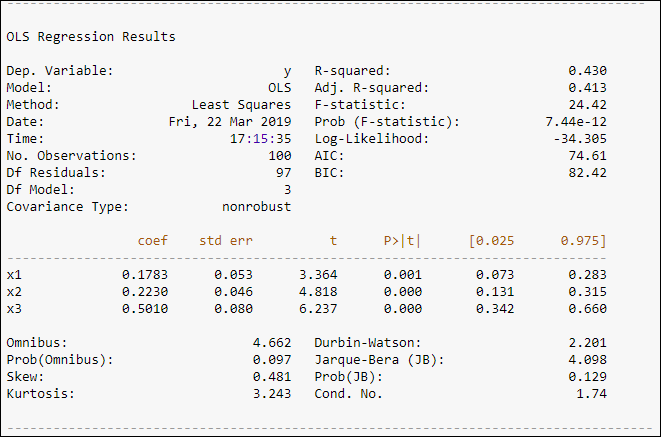

- $R^2$: Often referred to as "Goodness of fit"; measures how much of the variation in the response variable $y'$ is explained by variation in the explanatory variable(s). In general, __the larger the value of $R^2$, the more accurate the model is__. However, relatively large values of $R^2$ can also be an indication of the model being "overfit" to the training data.


- __Adjusted__ $R^2$: Increases if a new variable added to the model improves the fit of the model by more than would be expected by sheer chance. When comparing two models derived from the same data, models with __higher__ __Adjusted__ $R^2$ scores are preferable to those having relatively lower scores. 


- __AIC__: Akaike Information Criteria is a model selection metric that estimates the relative quality of a statistical model for a given set of data. When comparing two models derived from the same data, models with __lower__ __AIC__ scores are preferable to those having relatively higher scores.


- __BIC__: Bayesian Information Criteria is another model selection metric that estimates the unexplained variation in the response variable relative to the given explanatory variables. __BIC__ also imposes a "complexity" penalty when the number of explanatory variables used is increased.  When comparing two models derived from the same data, models with __lower__ __BIC__ scores are preferable to those having relatively higher scores.


- __F Statistic__: Indicates whether a significant amount of variance in the response variable $y'$ is explained by the model. When comparing two models derived from the same data, models with __higher__ __F Statistic__ scores are preferable to those having relatively lower scores. 


- __Log Likelihood__: A measure of how well a model fits the underlying data. When comparing two models derived from the same data, models with __higher__ __Log Likelihood__ scores are preferable to those having relatively lower scores. 


- __p values__: Measure the statistical significance of the explanatory variables in your model. While you are free to select the significance level on your own, most often 0.05 is used as the maximum bound for significance. As such, if any variable in your model is shown to have a __p value__ that exceeds 0.05, consider removing it from the model to see whether the fit/model selection metrics improve.


- __Root Mean Squared Error (RMSE)__: Average distance of a sample from its observed value to its predicted value. We calculate the RMSE by finding the square root of the average of the squared values of a model's residual values. When comparing two models derived from the same data, models with __lower__ __RMSE__ scores are preferable to those having relatively higher RMSE scores. 


## Performance Metrics for Classifiers

General confusion matrix + classification model performance metrics:
https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

__ROC (Receiver Operating Characteristic) Curve__: Calculate by plotting the __true positive rate (TPR)__ against the __false positive rate (FPR)__; http://www.saedsayad.com/model_evaluation_c.htm. Plotting TPR vs. FPR for a series of classification models constructed using different thresholds for predicting classifications yields a curve within a two-dimensional plane. The general algorithm when applied to a binary classifier works as follows:

- Calculate the scored probabilities for the unknown classification values of every observation in your data set


- Create an iterator + a set of data objects that can be used for capturing the output of the algorithm. You should have a distinct data object for each iteration you plan to run (e.g., a list or array or something similar of your own choosing). Each data object should contain 'n' elements where 'n' is equivalent to the number of observations in your model testing data set.


- Use the iterator to iterate through a sequence of threshold values where (0 <= threshold <= 1) and compare the scored probability of each observation to the threshold. (In practice, the iterator will increase by .01 increments). If the scored probablitity for a given observation exceeds the threshold, assign a value of 1 to the appropriate item within the corresponding iteration-specific data object. Otherwise assign a value of 0.


- Calculate and save the overall TPR and FPR values for the output of each iteration


- Plot the resulting TPR and FPR values against one another in a two-dimensional plot.


The resulting plot can be used to help you determine which threshold value is most effective for purposes of maximizing overall model performance.


__Area Under the Curve (AUC)__: In a ROC plot, AUC is determined by calculating the area in the plot that falls __below / to the right of__ the ROC curve.  A random classifier has an area under the curve of 0.5, while AUC for a perfect classifier is equal to 1. The higher the AUC score, the better the performance of a model.  AUC scores from different models can be compared against one another to help us determine which model has the best performance.


### When evaluating model performance, there is no single metric that is "more important" than any other

We should always assess and compare model performance using a variety of metrics. In some instances, certain metrics may be much more relevant than others. It is up to you as a data practitioner to decide which model performance metrics are most meaningful relative to both the data you are working with + the questions you are trying to answer with that data + the type(s) of models you have elected to employ. 

# Module 5 Assignment Guidelines / Requirements